# **Importamos librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Datos en la biblioteca**

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# **Vista de datos**

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


# **Creando la tabla**

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# **Agregamos la columna de MEDV con los datos de target**

In [5]:
boston['MEDV'] = boston_dataset.target

# **Analisis de los datos del Dataset**

# Total de datos

In [12]:
print('Total de filas: ', boston.shape[0], ' y Total de columnas: ', boston.shape[1])

Total de filas:  506  y Total de columnas:  14


# Total datos nulos

In [16]:
missing_values_count = boston.isnull().sum()
missing_values_count[0:10]

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
dtype: int64

# **Ahora graficamos los datos del dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


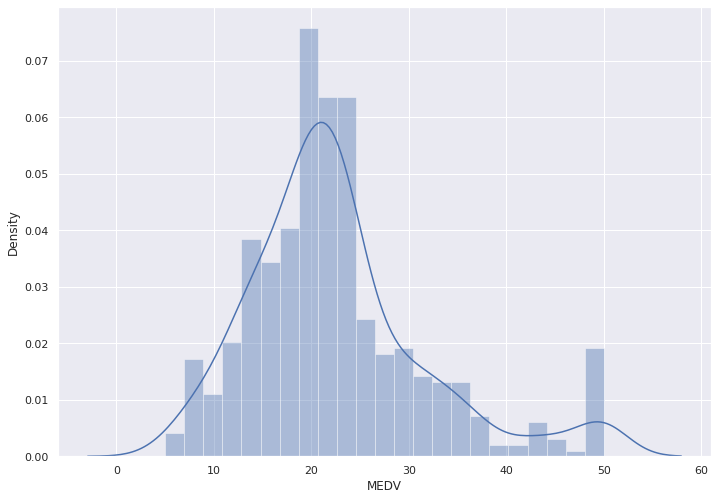

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #tamaño del grafico
sns.distplot(boston['MEDV']) #agregamos los datos
plt.show() #visualizamos el grafico

# **Matriz de correlacion de caracteristicas**

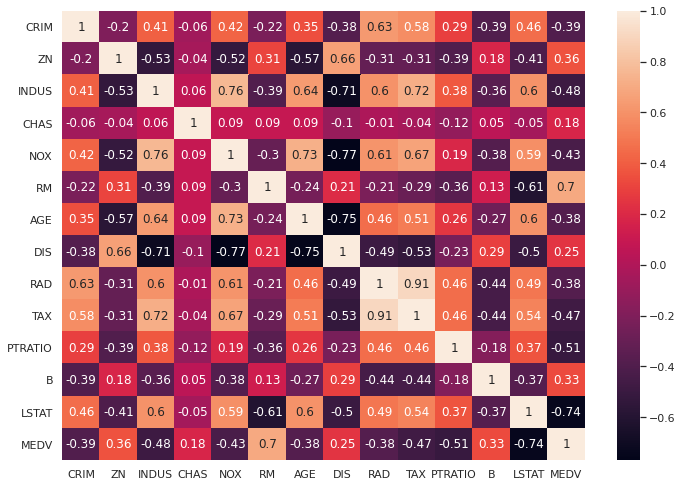

In [78]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# **Entrenando con los datos**

In [139]:
#Entrenando con una sola variable en X
X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
X = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])
X = pd.DataFrame(np.c_[boston['PTRATIO']], columns = ['PTRATIO'])
#entrenando con dos variables en X
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['PTRATIO'],boston['CRIM'],boston['NOX']
                       ,boston['INDUS'],boston['RM'],boston['B']], 
                 columns = ['LSTAT','PTRATIO','CRIM','NOX','INDUS','RM','B'])
Y = boston['MEDV']

# **50% de entrenamiento y 50% de prueba**

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state=7)
print("x70%: "+str(X_train.shape) +", x30%: "+str(X_test.shape))
print("y70%: "+str(Y_train.shape) +", y30%: "+str(Y_test.shape))

x70%: (253, 7), x30%: (253, 7)
y70%: (253,), y30%: (253,)


Utilizamos el random_state como una semilla, que nos ayudara a que cada vez que ejecutemos nuestro código no se generen nuevos valores aleatorios, y los conjuntos de datos de tren y prueba no cambien, en este caso será de un valor de 7.


# **Datos de entrenamiento en el algoritmo de regresión lineal**

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Ahora si probamos los datos**

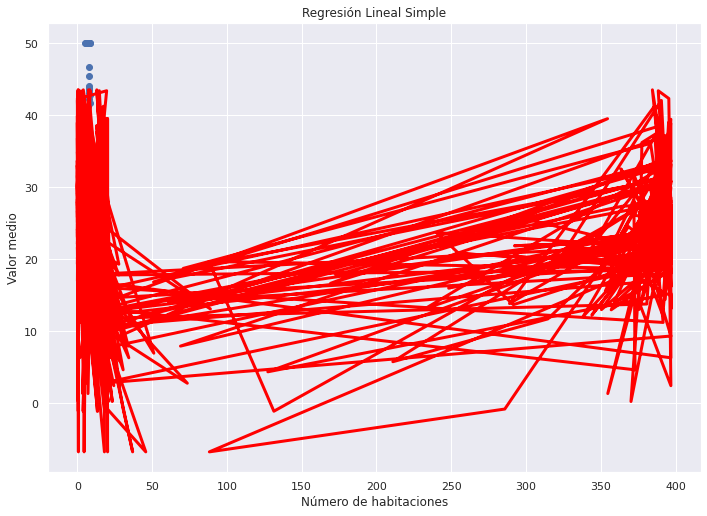


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.7626133083919527


In [145]:
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['RM'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))